# Heart Disease Predictions

## Feature Description

- age - The person's age in years
- sex - The person's sex (1 = male, 0 = female)
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: Heart disease (0 = no, 1 = yes)

In [48]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [49]:
# creating a dataframe of the data

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

**Number of Rows & Columns in the Dataset**

In [50]:
df.shape

(303, 14)

**Checking the Datatype of esch column**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Checking for any Null values**

In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There are no Null values present**

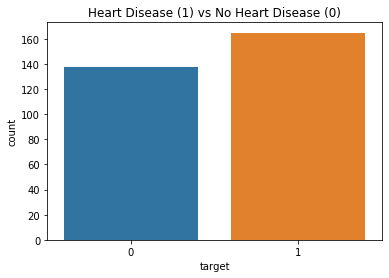

In [53]:
fig, ax = plt.subplots()

sns.countplot(x='target', data=df, ax=ax);

ax.set(title='Heart Disease (1) vs No Heart Disease (0)');

**There is no class imbalance present**

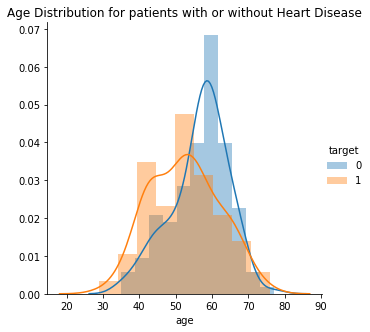

In [54]:
sns.FacetGrid(df, hue='target', size=4.5).map(sns.distplot, 'age').add_legend();
plt.title('Age Distribution for patients with or without Heart Disease');

In [55]:
print(df[df['target'] == 0]['age'].mean())
print(df[df['target'] == 1]['age'].mean())

56.60144927536232
52.4969696969697


**According to the Distribution, age does not seem contributing to having Heart Disease**

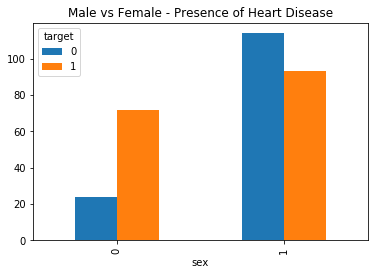

In [56]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Male vs Female - Presence of Heart Disease');

**According to this dataset females have a greter chance of having heart disease**

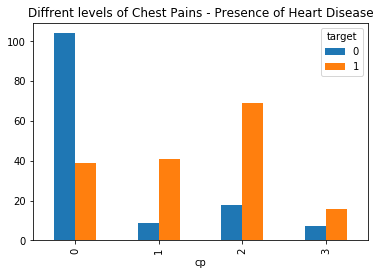

In [57]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar');
plt.title('Diffrent levels of Chest Pains - Presence of Heart Disease');

**Observations**
- Cp = 0, Not likely to have a Heart Disease
- Cp = 1, Very likely to have a Heart Disease
- Cp = 2, Very likely to have a Heart Disease
- Cp = 3, Moderately likely to have a Heart Disease

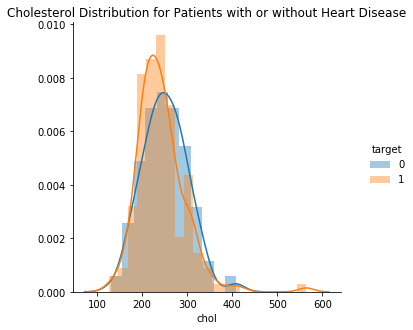

In [58]:
sns.FacetGrid(df, hue='target', height=4.5).map(sns.distplot, 'chol').add_legend();
plt.title('Cholesterol Distribution for Patients with or without Heart Disease');

**We can see that High Cholesterol (above 400) increases chances of having Heart Disease**

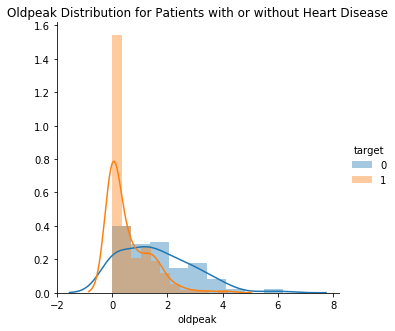

In [59]:
sns.FacetGrid(df, hue='target', height=4.5).map(sns.distplot, 'oldpeak').add_legend();
plt.title('Oldpeak Distribution for Patients with or without Heart Disease');

In [60]:
# Kurtosis
print(df[df['target'] == 0]['oldpeak'].kurtosis())
print(df[df['target'] == 1]['oldpeak'].kurtosis())
print()

# Max
print(df[df['target'] == 0]['oldpeak'].max())
print(df[df['target'] == 1]['oldpeak'].max())
print()

# Mean
print(df[df['target'] == 0]['oldpeak'].mean())
print(df[df['target'] == 1]['oldpeak'].mean())

0.4114339476791664
3.1883303417268154

6.2
4.2

1.5855072463768118
0.5830303030303029


**We can see an difference in the distribution of oldpeak, the kurtosis of oldpeak for people with Heart Disease is very high, whereas the kurtosis of oldpeak for people with no heart disease is low**

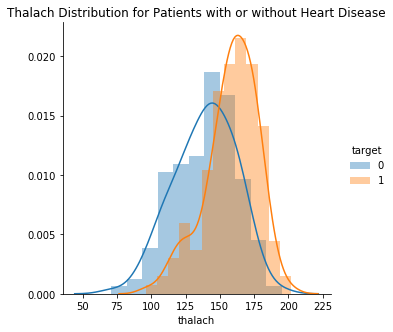

In [61]:
sns.FacetGrid(df, hue='target', height=4.5).map(sns.distplot, 'thalach').add_legend();
plt.title('Thalach Distribution for Patients with or without Heart Disease');

In [62]:
# Kurtosis
print(df[df['target'] == 0]['thalach'].kurtosis())
print(df[df['target'] == 1]['thalach'].kurtosis())
print()

# Mean
print(df[df['target'] == 0]['thalach'].mean())
print(df[df['target'] == 1]['thalach'].mean())

-0.19561575332241787
0.4607462283723254

139.1014492753623
158.46666666666667


**There is an difference in the mean for thalach, people with high thalach are prone to having heart disease**

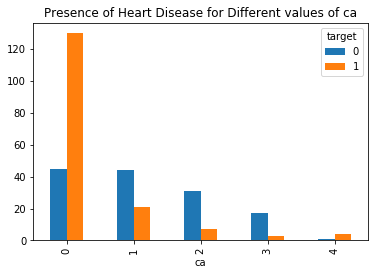

In [63]:
pd.crosstab(df['ca'], df['target']).plot(kind='bar');
plt.title('Presence of Heart Disease for Different values of ca');

**Observations**
- ca of 0 indicates a very high chance of heart disease

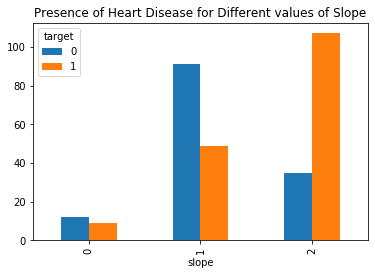

In [64]:
pd.crosstab(df['slope'], df['target']).plot(kind='bar');
plt.title('Presence of Heart Disease for Different values of Slope');

**Observations**
- slope of 2 indicates a very high chance of heart disease

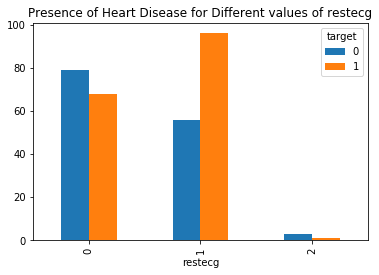

In [65]:
pd.crosstab(df['restecg'], df['target']).plot(kind='bar');
plt.title('Presence of Heart Disease for Different values of restecg');

**Observations**
- restecg of 1 indicates a greater chance of heart disease

# Modelling

In [66]:
# Seperating features as X & target as y

X = df.drop('target', axis=1)
y = df['target']

In [67]:
# Seperating Data into Training & Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# Importing all the metrics libraries

from sklearn.metrics import accuracy_score, confusion_matrix,\
precision_score, recall_score, f1_score

In [69]:
# Importing our model

from sklearn.svm import SVC

# Creating object of the model
model = SVC(C=5, kernel='linear', gamma=1)

# Fitting the model to our Training Data
model.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
# Calculating the predictions
y_preds = model.predict(X_test)

In [71]:
# Printing the Classification Repoet

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [72]:
cm = confusion_matrix(y_test, y_preds)

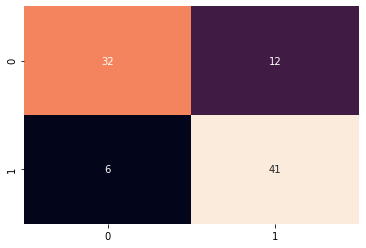

In [73]:
# Heatmap of Confusion Matrix

sns.heatmap(cm, annot=True, cbar=False)
plt.ylim(plt.gca().get_ylim()[0] + 0.5, plt.gca().get_ylim()[1] - 0.5);

In [74]:
# Scaling our Data to improve the model Performance

from sklearn.preprocessing import MinMaxScaler

for col in df[['trestbps', 'chol', 'thalach', 'age', 'oldpeak']]:
    mm = MinMaxScaler()
    df[col] = mm.fit_transform(df[[col]])

In [75]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3,0
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0,3,0
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,0.548387,1,2,3,0
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,0.193548,1,1,3,0


In [76]:
X2 = df.drop('target', axis=1)
y2 = df['target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [77]:
model2 = SVC(C=1, kernel='rbf', gamma=0.2)
model2.fit(X_train2, y_train2)
y_preds2 = model2.predict(X_test2)

In [78]:
cm2 = confusion_matrix(y_test2, y_preds2)

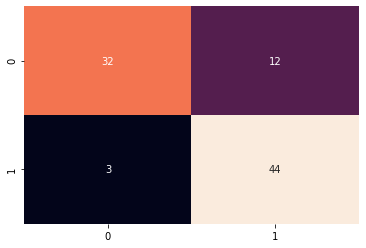

In [79]:
sns.heatmap(cm2, annot=True, cbar=False)
plt.ylim(plt.gca().get_ylim()[0] + 0.5, plt.gca().get_ylim()[1] - 0.5);

In [80]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



**By scaling our data we were able to increase our precision, and also increase recall for class 1 , which is what we ideally need when classifying Heart Disease**

In [81]:
from sklearn.metrics import roc_curve, auc

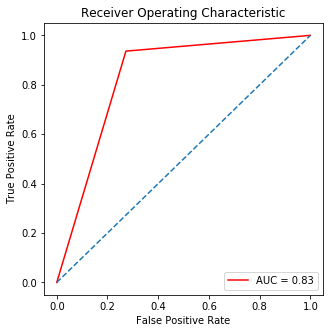

In [82]:
fpr, tpr, thres = roc_curve(y_test2, y_preds2)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()